In [1]:
import numpy as np

In [2]:
spread = 61

In [3]:
quantile_levels = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999, 0.9999]

In [4]:
CVA = np.array([9.09, 7.71, 7.20, 6.81, 6.39, 5.89, 5.26, 4.45, 3.31, 2.66, 1.67, 0.67, 0.35])
DVA = np.array([-0.51, -0.63, -0.65, -0.64, -0.60, -0.54, -0.45, -0.35, -0.21, -0.15, -0.07, -0.03, -0.02])
KVA = np.array([56.40, 40.25, 31.34, 24.56, 18.88, 13.95, 9.62, 5.82, 2.56, 1.42, 0.41, 0.03, 0.00])
MLA = np.array([1.98, 1.68, 1.61, 1.61, 1.66, 1.76, 1.91, 2.16, 2.60, 2.92, 3.56, 4.72, 5.70])
MVA = np.array([0.66, 1.04, 1.44, 1.86, 2.32, 2.83, 3.43, 4.19, 5.32, 6.06, 7.47, 9.92, 11.98])

FVA = MLA + MVA

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')
sns.set_style("whitegrid")

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda y, pos: "%.0f %%" % (100 * y))

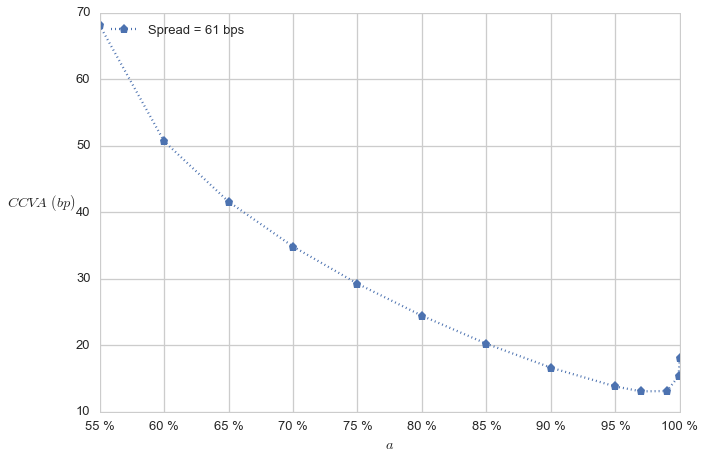

In [7]:
fig, ax = plt.subplots(1)

CCVA = CVA + FVA + KVA
plt.plot(quantile_levels, CCVA, "p:", label='Spread = %i bps' % spread)
    
handles, labels = ax.get_legend_handles_labels()

# reverse the order
ax.legend(handles[::-1], labels[::-1], loc='upper left')

ax.set_xlabel(r'$a$')
ax.xaxis.set_major_formatter(formatter)

ax.set_ylabel(r'$CCVA \, \, (bp)$', rotation='horizontal')
ax.yaxis.set_label_coords(-0.1, +0.5)

plt.show()

In [8]:
index = 0

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


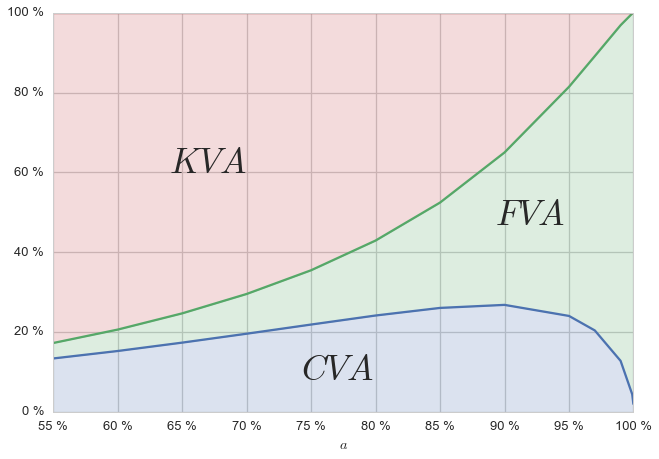

In [9]:
TVA = CVA + FVA + KVA
frac_cva = np.divide(CVA, TVA)
frac_cva_p_fva = np.divide(CVA + FVA, TVA)

palette = sns.color_palette(None, 3)
sns.set_palette(palette)

alpha = 0.2

fig, ax = plt.subplots(1)

ax.plot(quantile_levels, frac_cva)
ax.plot(quantile_levels, frac_cva_p_fva)
ax.plot(quantile_levels, map(lambda x: 1., quantile_levels))

ax.fill_between(quantile_levels, 0., frac_cva, where = frac_cva >= 0., 
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.77, 0.08, r"$CVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva, frac_cva_p_fva, where = frac_cva_p_fva >= frac_cva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.92, 0.47, r"$FVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva_p_fva, 1.0, where = 1. >= frac_cva_p_fva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.67, 0.60, r"$KVA$", horizontalalignment='center', fontsize=35)

ax.set_xlabel(r'$a$')

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

plt.show()